# Classification Tree

In [1]:
#!pip install pandas

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing prepared dataset
import pickle
input = open('data_LogRegr.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [4]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

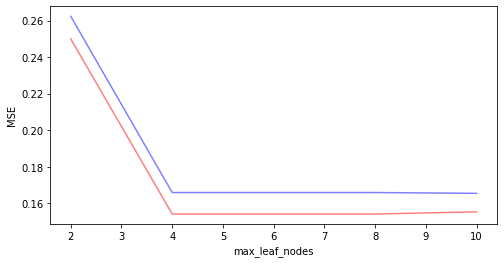

In [5]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [6]:
# Fitting Classification Tree to the Training set 
ct = DecisionTreeClassifier(max_leaf_nodes = 6, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [7]:

# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.8458333333333333

По графику видно, что обучающая выборка на всем промежутке больше за тестовую, что говорит о хорошем качестве. Экспериментным путем было выявлено, что наилучшее качество модели при max_leaf_nodes = 6.

In [8]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1061  131]
 [ 128  360]]


Выявлено неверно 259 обьектов. Однако данные сопоставимы.

# Forest

In [9]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

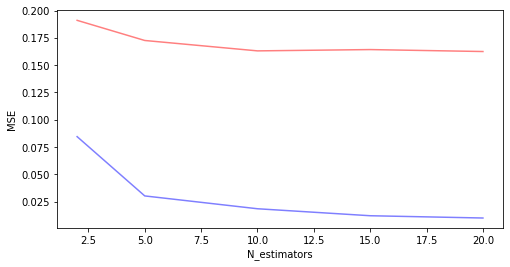

In [10]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [21]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=10, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

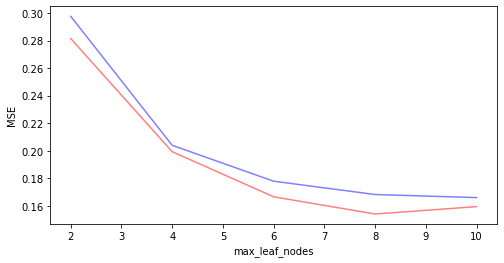

In [22]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [25]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators =10, max_leaf_nodes = 6, random_state = 10).fit(X_train, y_train)

In [26]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test)

0.8333333333333334

Экспериментым путем были выявлены наилучшие результаты для параметров n_estimators max_leaf_nodes. При таких знаучениях качество модели 83%, однако при измении этих параметров качество падало до 79%.

In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1121   71]
 [ 209  279]]


Неверно распознано 280 обьектов.

# CatBoost

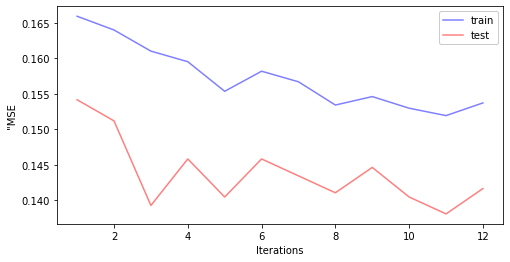

In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
def catboost_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostRegressor
catboost_best_n_estimator(X_train, X_test, y_train, y_test, list(range(1,13)))

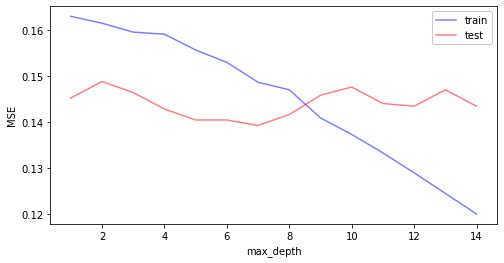

In [52]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=10,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

In [58]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
cb = CatBoostClassifier(iterations = 10, max_depth = 9, random_state = 10).fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.4958490	total: 10.1ms	remaining: 90.7ms
1:	learn: 0.4214029	total: 29.8ms	remaining: 119ms
2:	learn: 0.3764088	total: 47.6ms	remaining: 111ms
3:	learn: 0.3558254	total: 67.2ms	remaining: 101ms
4:	learn: 0.3425711	total: 85.5ms	remaining: 85.5ms
5:	learn: 0.3340656	total: 97.1ms	remaining: 64.7ms
6:	learn: 0.3265914	total: 115ms	remaining: 49.4ms
7:	learn: 0.3186442	total: 134ms	remaining: 33.4ms
8:	learn: 0.3137569	total: 152ms	remaining: 16.9ms
9:	learn: 0.3094315	total: 171ms	remaining: 0us


In [59]:
# Predicting the Test set results
y_pred = cb.predict(X_test)
y_pred = (y_pred > 0.5)
cb.score(X_test,y_test)

0.8595238095238096

In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cb = confusion_matrix(y_test, y_pred)
print(cb)

[[1087  105]
 [ 131  357]]


Распознано неверно 236 обьектов.

ОБЩИЙ ВЫВОД: итак, данный датасет отлично справляется с первопосталвенной задачей, где главной целью была качественная классификация обьекта (в отличии от созданной искуствееной задачи для построения регрессии). В целом, все модели имели высокое качество и примерно одинаковую распознаваемость обьектов. Однако, хотелось бы выделить модель CatBoost, где наименьшая ложная распознаваемость обьектов среди всех исследований. А так же сбалансированное неверное отнесение наблюдений (131 и 105). Далее по результам шли модели Логистиеческой регрессии и НС. Где неверно распознано 239 и 242 обьекта соответсвенно. Однако результаты ложного распознавания менее сбалансированы. Однако, напомню, что в нашей задачи классификации важна точность модели и поэтому в погоне за качеством побеждает модель классификации CatBoost, которая и рекомендуется для дальнейшего использования и корректного определения уровня благосостояния человека 